<a href="https://www.kaggle.com/code/dalepeh/eda-model-pipepline?scriptVersionId=120059197" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [321]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hdb-resale-2017-2023feb/completed_flat_price_2017_2023.csv
/kaggle/input/hdb-resale-2017-2023feb/CPI_2000to2022Feb.csv


## Import Libaries & Data

In [322]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [323]:
hdb_resale = pd.read_csv('/kaggle/input/hdb-resale-2017-2023feb/completed_flat_price_2017_2023.csv')

In [324]:
hdb_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146872 entries, 0 to 146871
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                146872 non-null  object 
 1   town                 146872 non-null  object 
 2   flat_type            146872 non-null  object 
 3   block                146872 non-null  object 
 4   street_name          146872 non-null  object 
 5   storey_range         146872 non-null  object 
 6   floor_area_sqm       146872 non-null  float64
 7   flat_model           146872 non-null  object 
 8   lease_commence_date  146872 non-null  int64  
 9   remaining_lease      146872 non-null  object 
 10  resale_price         146872 non-null  float64
 11  full_address         146872 non-null  object 
 12  Longitude            146842 non-null  float64
 13  Latitude             146872 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 15.7+ MB


In [325]:
hdb_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987


In [326]:
cpi_housing = pd.read_csv(r'/kaggle/input/hdb-resale-2017-2023feb/CPI_2000to2022Feb.csv')

In [327]:
cpi_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tranc_Yr     278 non-null    int64  
 1   Tranc_Mth    278 non-null    object 
 2   CPI Housing  278 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.6+ KB


In [328]:
cpi_housing.tail()

,Tranc_Yr,Tranc_Mth,CPI Housing
273,2022,October,106.702
274,2022,November,108.770
275,2022,December,109.040
276,2023,January,109.290
277,2023,February,109.350


## Data Processing

### 1. Split 'month' to 'Tranc_Yr' and 'Tranc_Mth' columns

In [329]:
#Convert month to datetime and format to Month period
hdb_resale['month'] = pd.to_datetime(hdb_resale['month'])

#Get 'Tranc_Yr' and 'Tranc_Mth' columns
hdb_resale['Tranc_Yr'] = hdb_resale['month'].dt.year
hdb_resale['Tranc_Mth'] = hdb_resale['month'].dt.month_name()

### 2. Add Consumer Price Index for Housing Get Adjusted_Price

In [330]:
# Update and merge CPI
hdb_resale = pd.merge(hdb_resale, cpi_housing,left_on=['Tranc_Yr', 'Tranc_Mth'],right_on=['Tranc_Yr', 'Tranc_Mth'],how='left')

In [331]:
#Add "Adjusted-Price" calculated from CPI Housing
hdb_resale['Adjusted_Price'] =  hdb_resale['resale_price'] * (109.350 / hdb_resale['CPI Housing'])

#Round the Adjusted_Price round to nearest thousand
hdb_resale['Adjusted_Price'] =hdb_resale.Adjusted_Price.round(-2)

In [332]:
hdb_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude,Tranc_Yr,Tranc_Mth,CPI Housing,Adjusted_Price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941,2017,January,106.614,238000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242,2017,January,106.614,256400.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760,2017,January,106.614,268700.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223,2017,January,106.614,271800.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987,2017,January,106.614,271800.0


### 3. Split 'years' to 'remaining_yr' and 'remaining_month' columns

In [333]:
#split remaining_lease into year and month columns
hdb_resale[['remaining_yr','remaining_month']] = hdb_resale.remaining_lease.str.split("years ", expand=True)

#remove the word 'years' and empty spaces
hdb_resale['remaining_yr'] = hdb_resale['remaining_yr'].replace({r'\byears?\b': '', ' ': ''}, regex=True)

#delete 'months' and empty spaces in remaining_month
hdb_resale['remaining_month'] = hdb_resale['remaining_month'].replace({r'\bmonths?\b': '', ' ': ''}, regex=True)

In [334]:
# list values of remaining_month
hdb_resale.remaining_month.unique()

array(['04', '07', '05', '01', None, '06', '08', '10', '03', '09', '11',
       '02', '0'], dtype=object)

In [335]:
#fill null values with 0
hdb_resale['remaining_month'] = hdb_resale.remaining_month.fillna(0)

#convert remaining_yr to integer
hdb_resale['remaining_yr'] = hdb_resale['remaining_yr'].astype(int)

#convert remaining_month to integer
hdb_resale['remaining_month'] = hdb_resale['remaining_month'].astype(int)

#turn remaining month /12 to get decimal
hdb_resale['remaining_month'] = hdb_resale['remaining_month'] / 12

#change compute remaining_year by adding remaining_month
hdb_resale['remaining_yr'] = hdb_resale['remaining_yr'] + hdb_resale['remaining_month']

#drop remaining_month
hdb_resale.drop('remaining_month', axis = 1, inplace=True)

In [336]:
hdb_resale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146872 entries, 0 to 146871
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                146872 non-null  datetime64[ns]
 1   town                 146872 non-null  object        
 2   flat_type            146872 non-null  object        
 3   block                146872 non-null  object        
 4   street_name          146872 non-null  object        
 5   storey_range         146872 non-null  object        
 6   floor_area_sqm       146872 non-null  float64       
 7   flat_model           146872 non-null  object        
 8   lease_commence_date  146872 non-null  int64         
 9   remaining_lease      146872 non-null  object        
 10  resale_price         146872 non-null  float64       
 11  full_address         146872 non-null  object        
 12  Longitude            146842 non-null  float64       
 13  Latitude      

### 4. Split 'storey_range' into 'lower_flr', 'median_flr', 'higher_flr'

In [337]:
# Split the storey_range column into lower, mid, and higher columns
hdb_resale[['lower_flr', 'higher_flr']] = hdb_resale['storey_range'].str.split(' TO ', expand=True)

# Calculate the median value for each range and add a mid column
hdb_resale['median_flr'] = hdb_resale.apply(lambda row: str((int(row['lower_flr']) + int(row['higher_flr'])) // 2), axis=1)

# Convert 'mid' column as integer
hdb_resale['median_flr'] = hdb_resale['median_flr'].astype(int) 

**Explanation to above steps:**

As we are not sure exactly which storey the unit is located, we use the median value as the unit's storey.

### 5. Get Distance from CBD

Using haversine_distance. We will be taking Raffles Place at the City Centre (CBD)

In [338]:
# Create a New column to calculate the distance from Raffles Place (CBD)

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])

    # Compute the Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Raffles Place coordinates
raffles_place_latitude, raffles_place_longitude = 1.2833, 103.8501

# Calculate the distance between each location and Raffles Place
hdb_resale['Distance_from_CBD'] = haversine_distance(hdb_resale['Latitude'], hdb_resale['Longitude'],
                                                       raffles_place_latitude, raffles_place_longitude)

### 6. Create a new DataFrame with only Feature Columns that will be used. 

In [339]:
#Create a new DataFrame call df_resale as these will be the features we are using for modelling
df_resale = hdb_resale[['Tranc_Yr', 'Tranc_Mth', 'town', 'flat_type', 'flat_model', 'median_flr',
                      'Distance_from_CBD', 'remaining_yr', 'floor_area_sqm', 'resale_price', 'Adjusted_Price']]

df_resale

,Tranc_Yr,Tranc_Mth,town,flat_type,flat_model,median_flr,Distance_from_CBD,remaining_yr,floor_area_sqm,resale_price,Adjusted_Price
0,2017,January,ANG MO KIO,2 ROOM,Improved,11,9.662606,61.333333,44.0,232000.0,238000.0
1,2017,January,ANG MO KIO,3 ROOM,New Generation,2,10.728107,60.583333,67.0,250000.0,256400.0
2,2017,January,ANG MO KIO,3 ROOM,New Generation,2,10.959149,62.416667,67.0,262000.0,268700.0
3,2017,January,ANG MO KIO,3 ROOM,New Generation,5,9.254080,62.083333,68.0,265000.0,271800.0
4,2017,January,ANG MO KIO,3 ROOM,New Generation,2,10.989954,62.416667,67.0,265000.0,271800.0
...,...,...,...,...,...,...,...,...,...,...,...
146867,2023,February,YISHUN,5 ROOM,Improved,2,14.761682,64.083333,127.0,700000.0,700000.0
146868,2023,February,YISHUN,5 ROOM,Improved,11,14.501767,64.166667,122.0,700000.0,700000.0
146869,2023,February,YISHUN,EXECUTIVE,Apartment,8,15.641165,68.416667,181.0,1068000.0,1068000.0
146870,2023,February,YISHUN,EXECUTIVE,Maisonette,11,16.264229,64.833333,146.0,838000.0,838000.0


## EDA - Overall Descriptive Stats

### 7.1 Descriptive Stats

In [340]:
yr_resale = df_resale.groupby(['Tranc_Yr', 'flat_type'])['resale_price'].describe().round()
yr_resale.style.format('{:.0f}', na_rep="")\
.background_gradient(cmap='YlOrRd', text_color_threshold=0.1)\
.bar(subset=['count'], color='#01C6BA', align='zero')

**Notes:**

1. Demand for Three to Five ROOM and Executive flat types have seen a steady growth from 2017 to 2021 and a slight drop in 2022.
2. 5 Room has consistently high standard deviation followed by 4 Room and Executive. 
3. Resale price appears well distributed for all flat type range in the first 3 quatile. However, the max value starts to show interesting trend for all flat type.
4. 5 Room type commanding highest price almost every year. 
5. Past records have shown that newly MOP** (Minimum Occupancy Period) of DBSS and BTO flats are pushing the price ceiling of past $1million. The next descriptive data should give a clear picture of how premium type flats are affecting the resale price and making headlines on property news. 

**[Read more information about MOP](https://www.hdb.gov.sg/residential/selling-a-flat/eligibility)

In [341]:
type_model = df_resale.groupby(['flat_type', 'flat_model'])['resale_price'].describe().round()
type_model.style.format('{:.0f}', na_rep="")\
.background_gradient(cmap='YlOrRd', text_color_threshold=0.1)\
.bar(subset=['count'], color='#01C6BA', align='zero')

**Transaction Count**

1. 4 Room Model A was the most transacted for the last 6 years with 36,609.
2. This is followed by 5 Room Improved with total of 25,862 transactions. 
3. Most popular 3 Room is New Generation model with 11,754 transactions made.
4. Specific models like Adjoined, Premium Apartment, DBSS, Terrace, Premium Apartment Loft and Type S1 & S2 are gaining high resale price in their own flat type groups.
5. The challenge with predicting prices for the abovementioned models may be challenging because some of these models are unique with limited small number of transactions. 

#### A Look at Price with CPI Adjustment

In [342]:
type_model = df_resale.groupby(['flat_type', 'flat_model'])['Adjusted_Price'].describe().round()
type_model.style.format('{:.0f}', na_rep="")\
.background_gradient(cmap='YlOrRd', text_color_threshold=0.1)\
.bar(subset=['count'], color='#01C6BA', align='zero')

When CPI is applied on the resale price, it will not be surprising that we may be seeing more premium / special flat models surpassing SGD1.5mil in the year of 2023 in the 4 and 5 Room category.

[2022 Article on flats selling above SGD1million](https://mothership.sg/2022/05/henderson-road-flat-record-price/)

#### Percentage of Flats that are Selling above SGD1million

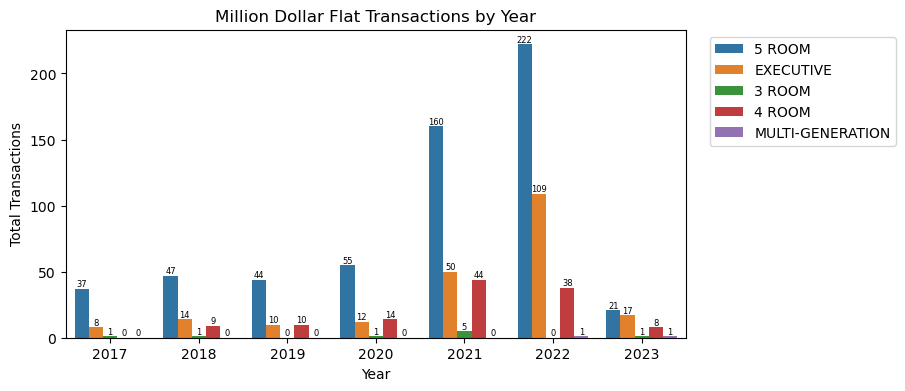

In [343]:
#Get flat selling above SGD1million
mil_resale = df_resale[df_resale['resale_price'] >= 1000000]

#Countplot of flats above SGD1million
fig, ax = plt.subplots(figsize=(8, 4))
mil_count = sns.countplot(data=mil_resale, x='Tranc_Yr', hue='flat_type')
mil_count.legend(loc='right', bbox_to_anchor=(1.35, 0.8), ncol=1)
for container in ax.containers:
    ax.bar_label(container, size=6)
plt.xlabel("Year")
plt.ylabel("Total Transactions")
plt.title("Million Dollar Flat Transactions by Year")

plt.show()

**Note:**

There is an alarming huge rise of SGD1million flats transacted from 2021. where the total number transacted tripled / quadruple from 2020.  

### 7.2 Visualization

#### Pair Plot

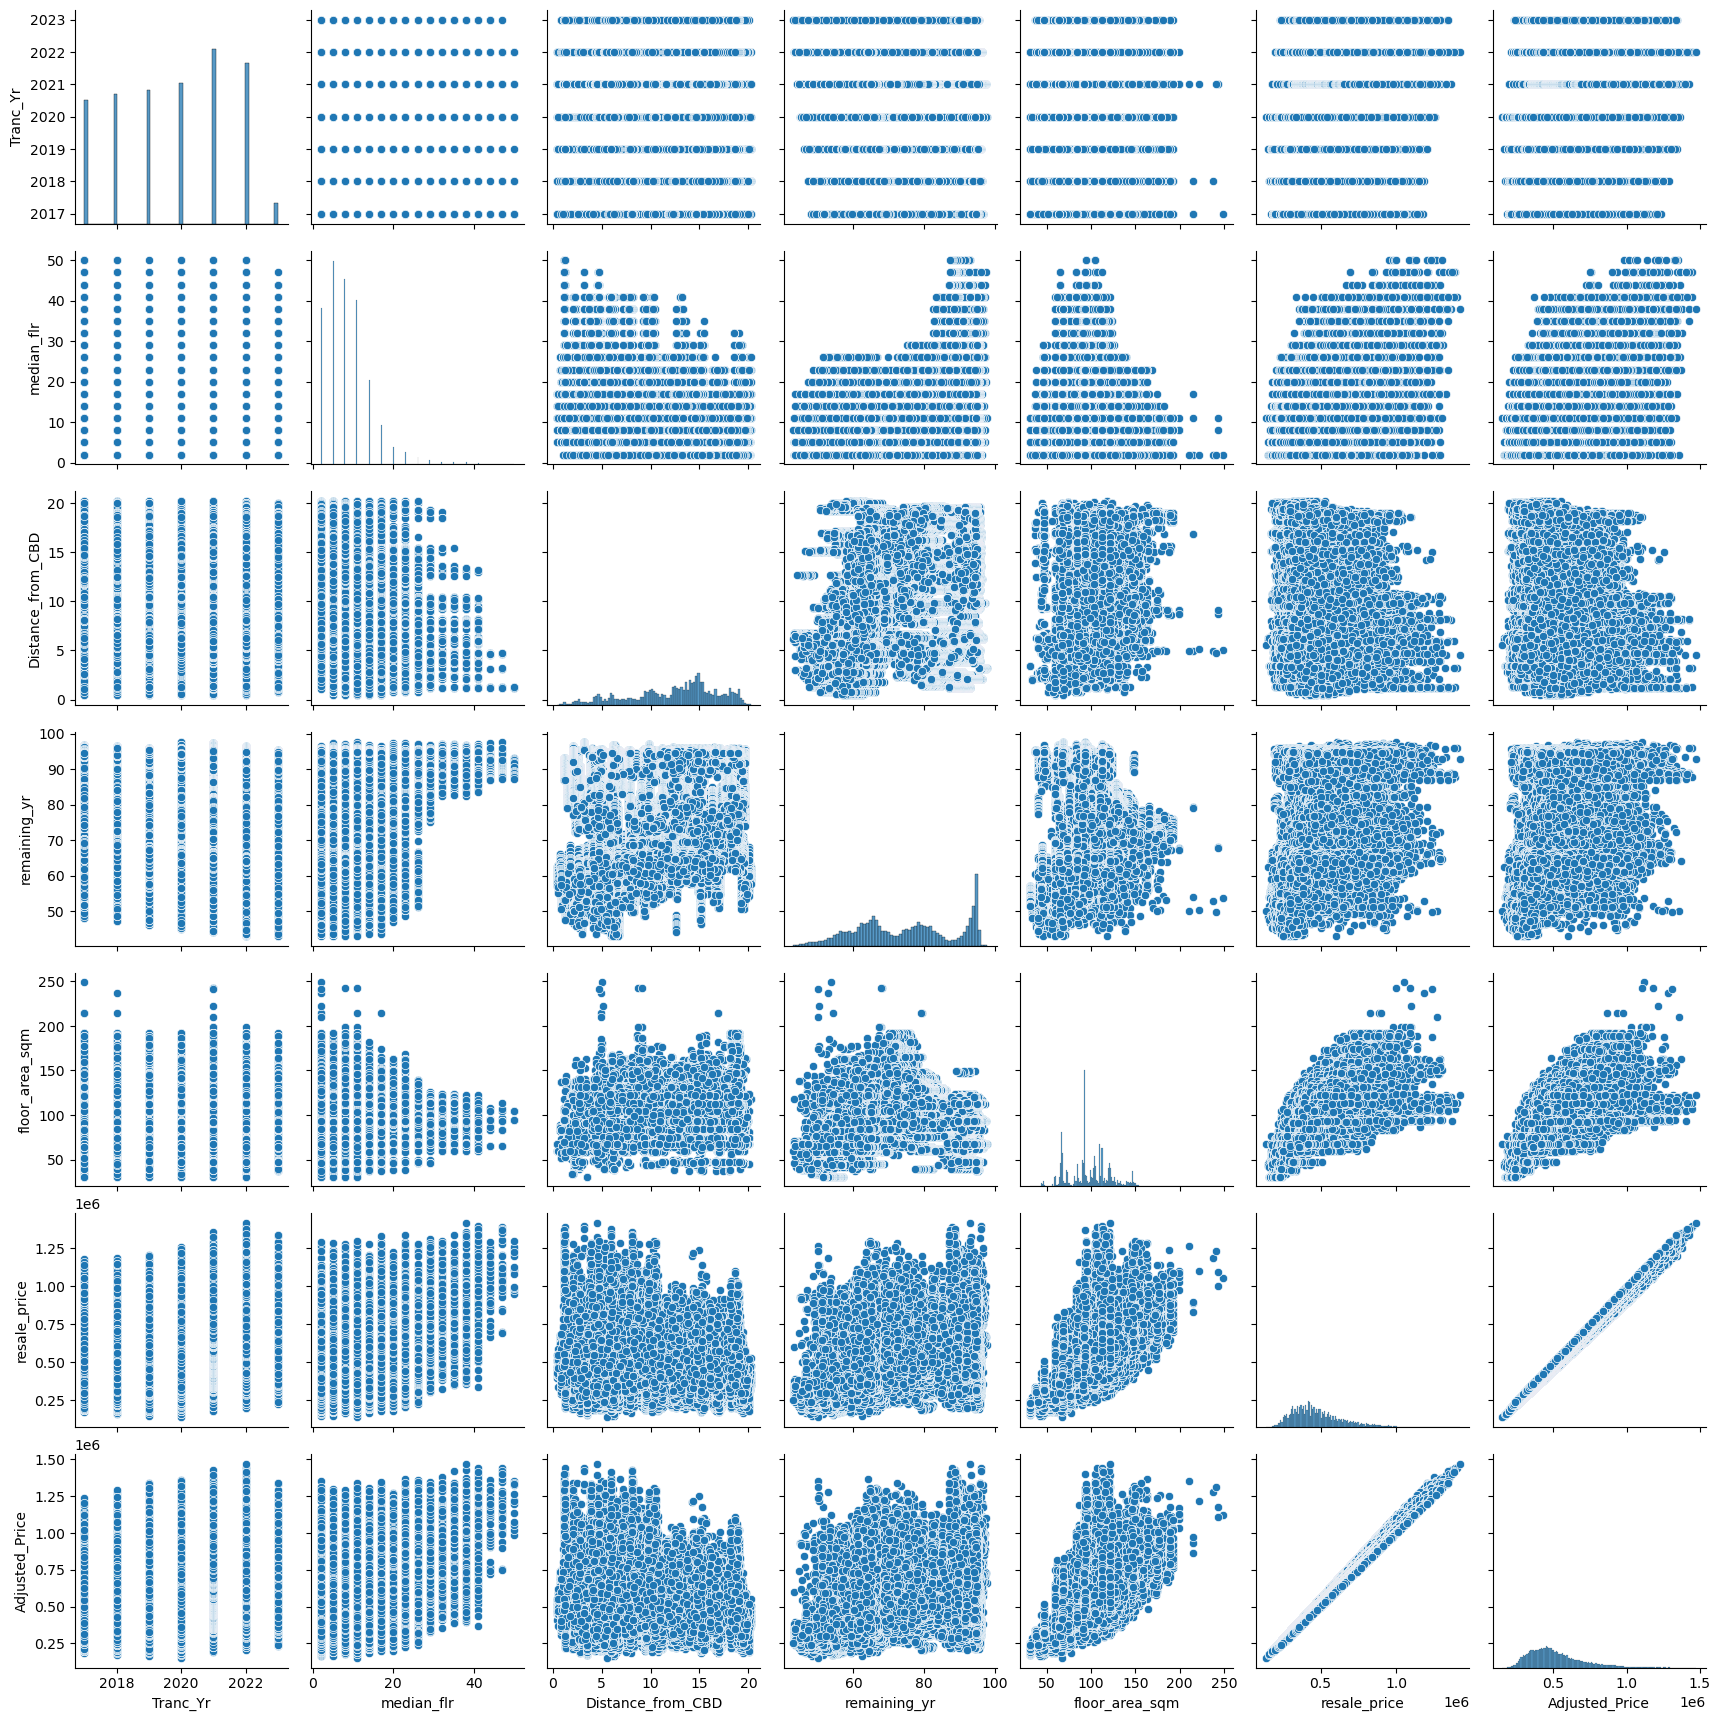

In [344]:
sns.pairplot(df_resale)
plt.show()

**Notes:**

1. median_flr shows that price shift upwards for higer storey units. 
2. floor_area_sqm directly influence the resale_price. 
3. Price of flats are generally more expensive when they are closer to CBD. Those furthest from CBD generally fetch lower price. 
4. The resale price distribution is more right skewed. Which means that most flats are still transacted below the overall mean resale_price. 
5. However, it is still a concern 

#### Correlation Heat Map

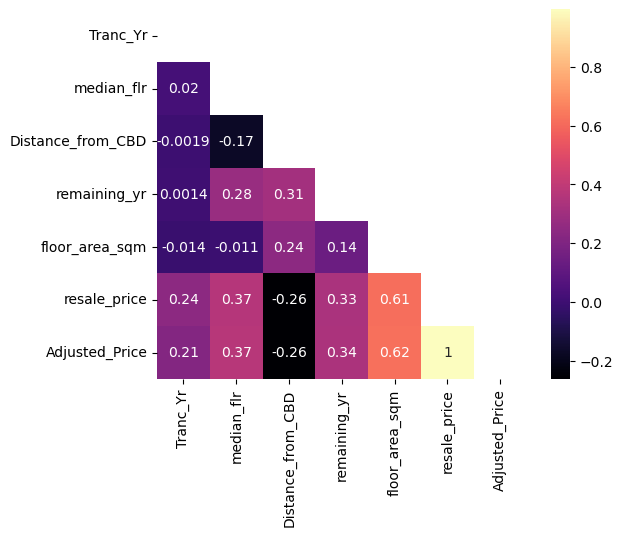

In [345]:
# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(df_resale.corr(), dtype=bool))

# Create the heatmap with the mask and square parameters
sns.heatmap(df_resale.corr(), cmap="magma", mask=mask, square=True, annot = True)

plt.show()

**Explanations:**

- Numeric features selected have some correlation with resale price. 
- Floor_area_sqm has the highest correlation. 
- The correlation is adjusted to 0.01 if we are using Adjusted_Price instead of resale_price for floor area sqm.
- Distance from CBD has an inverse correlation which is somewhat in line with the common belief that flats closest to the city are usually more expensive.
- It is also noted that flats are older in the city as compared to those further away. Newer towns are built later and further away from city. 
- This also explains why the resale price for flats nearer to CBD could be normalised by lease period even though they are older, these flats still fetch a higher price.

#### Count Plot by Year

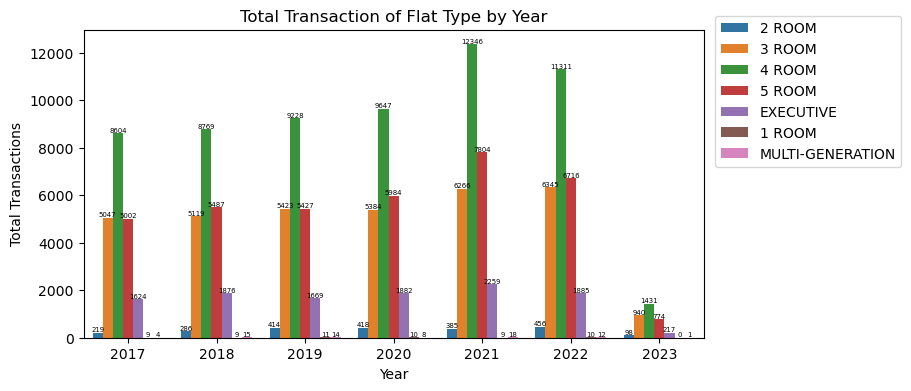

In [346]:
fig, ax = plt.subplots(figsize=(8, 4))
flat_type_count = sns.countplot(data=df_resale, x='Tranc_Yr', hue='flat_type')
flat_type_count.legend(loc='right', bbox_to_anchor=(1.33, 0.8), ncol=1)
for container in ax.containers:
    ax.bar_label(container, size=5)
plt.xlabel("Year")
plt.ylabel("Total Transactions")
plt.title("Total Transaction of Flat Type by Year")

plt.show()

- Demand for resale has been climbing steadily over the years. 

- There is a slight fall for 4 Room, 5 Room and Executive in 2022. 

#### Count Plot by Month in 2022

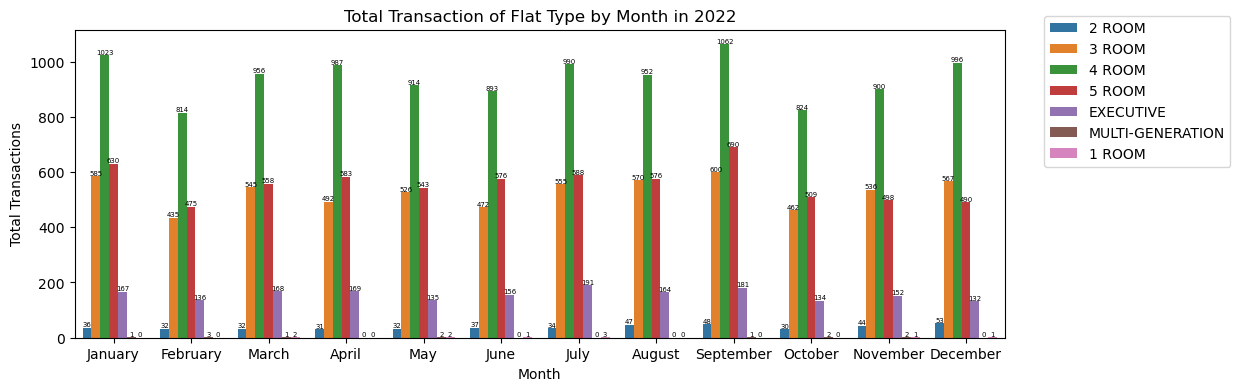

In [347]:
# Countplot of resale by month in the year 2022
fig, ax = plt.subplots(figsize=(12,4))
sale_2022 = df_resale[df_resale['Tranc_Yr'] == 2022]
sale_2022_countplot = sns.countplot(data=sale_2022, x='Tranc_Mth', hue='flat_type')
sale_2022_countplot.legend(loc='right', bbox_to_anchor=(1.25, 0.8), ncol=1)
for container in ax.containers:
    ax.bar_label(container, size=5)
plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.title("Total Transaction of Flat Type by Month in 2022")

plt.show()

- In 2022, the months of January, April, July, September and December saw higher transactions as compared to other months. 

#### Median Resale Price by Year

In [348]:
yearly_med_price = df_resale.groupby(['Tranc_Yr', 'flat_type'])['resale_price'].median().round()
yearly_med_price = pd.DataFrame(yearly_med_price).reset_index()

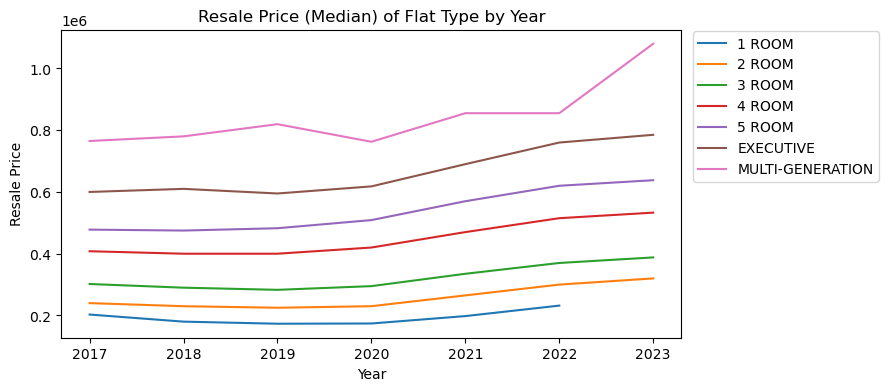

In [349]:
fig, ax = plt.subplots(figsize=(8,4))
yr_med_price = sns.lineplot(data=yearly_med_price, x='Tranc_Yr', y='resale_price', hue='flat_type')
yr_med_price.legend(loc='right', bbox_to_anchor=(1.33, 0.75), ncol=1)

plt.xlabel("Year")
plt.ylabel("Resale Price")
plt.title("Resale Price (Median) of Flat Type by Year")

plt.show()

- In general, price of all flats are on steady climb since 2017.
- Mult-Gen flats saw some ups and down in prices. However, in 2023, it saw a jump in median price to cross SGD1million.
- [Article on "Yishun multi-gen flat sold for new record price of SGD1.08m" - asiaone.com](https://www.asiaone.com/money/yishun-multi-gen-flat-sold-new-record-price-108m)

#### Resale Price (Median) by Floor Area

In [350]:
flr_area_avgprice = df_resale.groupby(['floor_area_sqm', 'flat_type'])['resale_price'].median().round()
flr_area_avgprice = pd.DataFrame(flr_area_avgprice).reset_index()

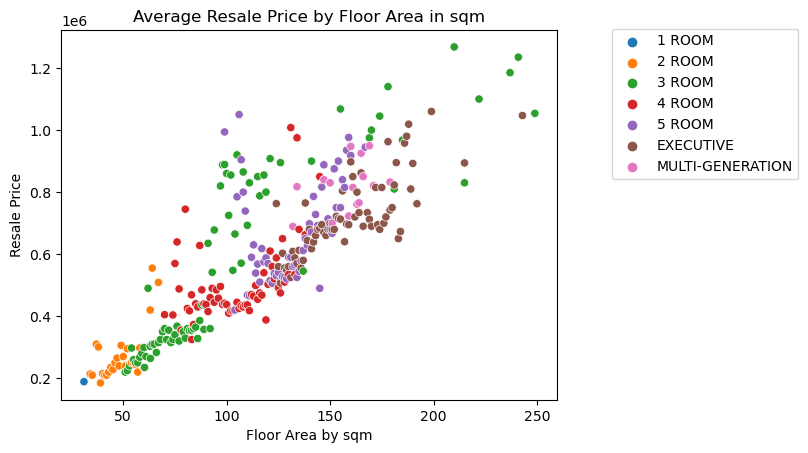

In [351]:
yflr_area_price = sns.scatterplot(data=flr_area_avgprice, x='floor_area_sqm', y='resale_price', hue='flat_type')
yflr_area_price.legend(loc='right', bbox_to_anchor=(1.5, 0.8), ncol=1)
plt.xlabel("Floor Area by sqm")
plt.ylabel("Resale Price")
plt.title("Average Resale Price by Floor Area in sqm")

plt.show()

**Notes:**

1. In general, the floor area per sqm is very much in line with the resale price. Those 3 to 5-Room flats that have bigger floor areas are the Terrace, Adjoined, Premium Loft models. These are unique models and the price range is usually higher than the common models.

2. 3 Room Flat Type can be predicted well below 100sqm. Price distribution is more disperse for bigger 3 Room Type. 

3. 4 Room Flat Type price range is dispersed for the smaller floor area and bigger floor area. This is probably influence by newer BTO flats (smaller sizes) and lofts & Terraces (bigger sizes)

4. 5 Room flat type share quite similar trend as 4 Room flat type

5. Base on this scatter plot, a simple linear regression model will not be able to predict well as the flat models does shift the resale price from a normal regression line; creating a big price difference when we do prediction.

#### Simple Regression vs Polynomial Regression Plot

##### 3 Room Flat Type

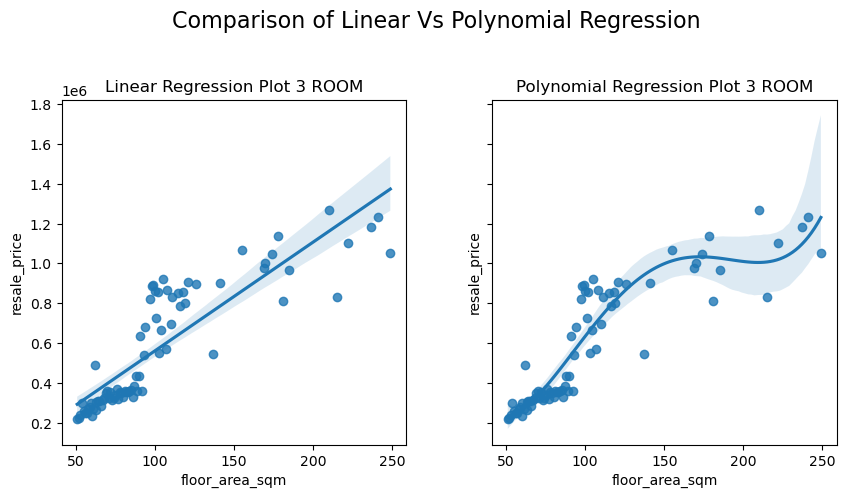

In [352]:
#create a 3 room linear and polynomial regplot
Three_flr_price = flr_area_avgprice[flr_area_avgprice['flat_type']=='3 ROOM']

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
three_room_slr = sns.regplot(x='floor_area_sqm', y='resale_price', data=Three_flr_price, ax=ax1)
three_room_poly = sns.regplot(x='floor_area_sqm', y='resale_price', data=Three_flr_price, order=4, ax=ax2)
three_room_slr.set_title('Linear Regression Plot 3 ROOM')
three_room_poly.set_title('Polynomial Regression Plot 3 ROOM')
fig.suptitle('Comparison of Linear Vs Polynomial Regression', fontsize = 16)
plt.subplots_adjust(top=0.8, wspace=0.25)

plt.show()

##### 4 Room Flat Type

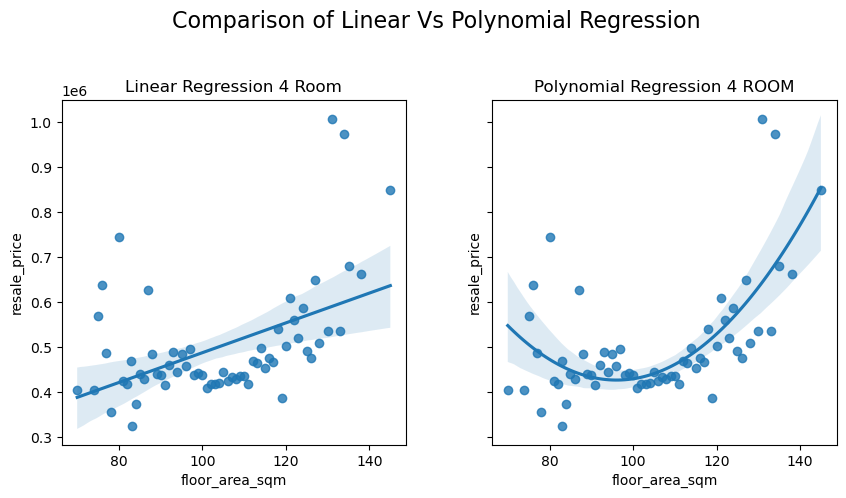

In [353]:
# Creating a four room linear & polynomial regplot
Four_flr_price = flr_area_avgprice[flr_area_avgprice['flat_type']=='4 ROOM']

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
four_room_slr = sns.regplot(data=Four_flr_price, x='floor_area_sqm', y='resale_price', ax=ax1)
four_room_poly = sns.regplot(x='floor_area_sqm', y='resale_price', data=Four_flr_price, order=2, ax=ax2)

four_room_slr.set_title('Linear Regression 4 Room')
four_room_poly.set_title('Polynomial Regression 4 ROOM')
fig.suptitle('Comparison of Linear Vs Polynomial Regression', fontsize = 16)
plt.subplots_adjust(top=0.8, wspace=0.25)

plt.show()

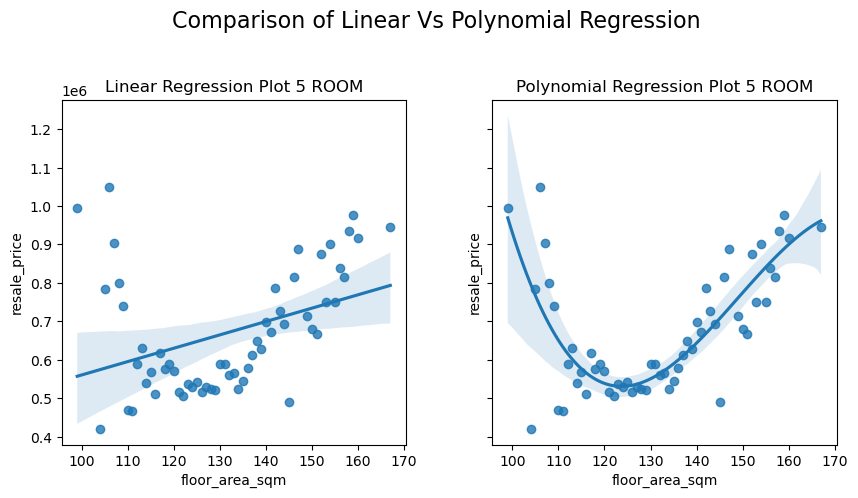

In [354]:
### create a 5 room polynomial regplot
Five_flr_price = flr_area_avgprice[flr_area_avgprice['flat_type']=='5 ROOM']

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)
five_room_slr = sns.regplot(x='floor_area_sqm', y='resale_price', data=Five_flr_price, ax=ax1)
five_room_poly = sns.regplot(x='floor_area_sqm', y='resale_price', data=Five_flr_price, order=3, ax=ax2)
five_room_slr.set_title('Linear Regression Plot 5 ROOM')
five_room_poly.set_title('Polynomial Regression Plot 5 ROOM')
fig.suptitle('Comparison of Linear Vs Polynomial Regression', fontsize = 16)
plt.subplots_adjust(top=0.8, wspace=0.25)

plt.show()

As we can see from 3 Room, 4 Room and 5 Room regression plotting, the simple regression will be hard to get a good prediction even by adding gradient descent function.  

**The question is:** Will we overfit the polynomial regression model? 

The dilemma of variance reduction vs reducing bias

### Using CPI Adjusted for Modeling

Let's see if there will be bigger or smaller variances if we use Adjusted Price instead

In [355]:
flr_area_avg_ap = df_resale.groupby(['floor_area_sqm', 'flat_type'])['Adjusted_Price'].median().round()
flr_area_avg_ap = pd.DataFrame(flr_area_avg_ap).reset_index()

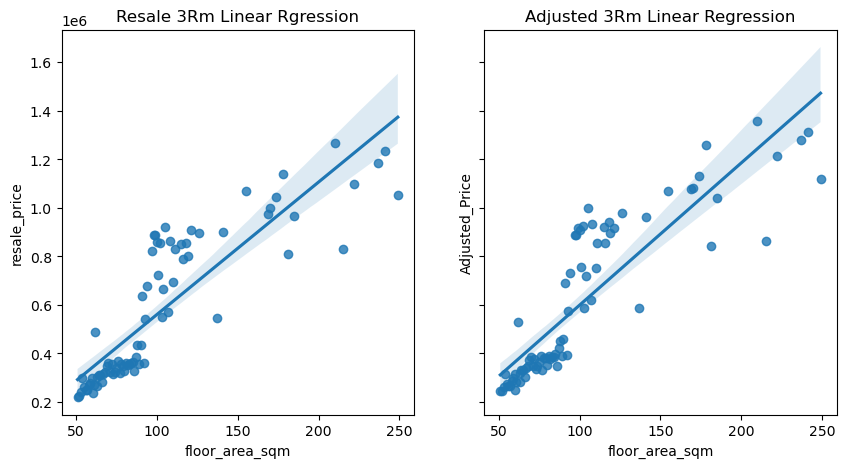

In [356]:
#create a 3 room linear and polynomial regplot
Three_flr_ap = flr_area_avg_ap[flr_area_avg_ap['flat_type']=='3 ROOM']

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
three_room_slr = sns.regplot(x='floor_area_sqm', y='resale_price', data=Three_flr_price, ax=ax1)
three_room_ap_slr = sns.regplot(x='floor_area_sqm', y='Adjusted_Price', data=Three_flr_ap, ax=ax2)
three_room_slr.set_title('Resale 3Rm Linear Rgression')
three_room_ap_slr.set_title('Adjusted 3Rm Linear Regression')

plt.show()

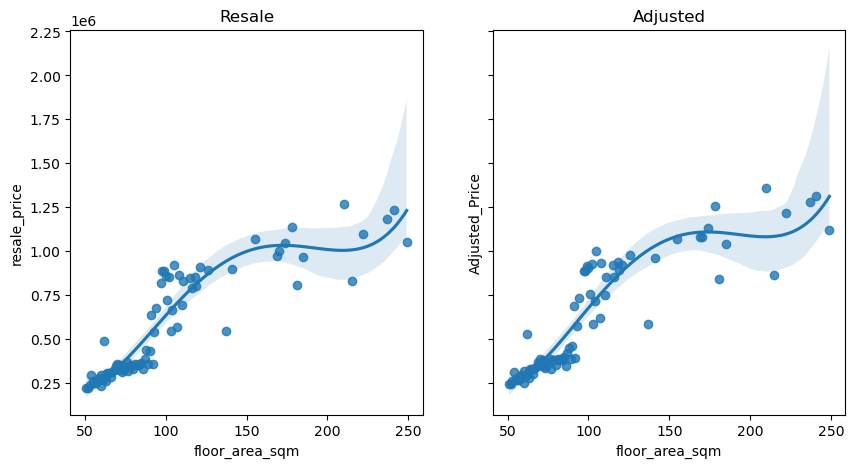

In [357]:
#Comparing Adjust_price vs Resale Price 3 Room
Three_flr_ap = flr_area_avg_ap[flr_area_avg_ap['flat_type']=='3 ROOM']

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
resale_three_room = sns.regplot(x='floor_area_sqm', y='resale_price', data=Three_flr_price, order =4 ,ax=ax1)
adjusted_three_room = sns.regplot(x='floor_area_sqm', y='Adjusted_Price', data=Three_flr_ap, order=4, ax=ax2)
resale_three_room.set_title('Resale')
adjusted_three_room.set_title('Adjusted')

plt.show()

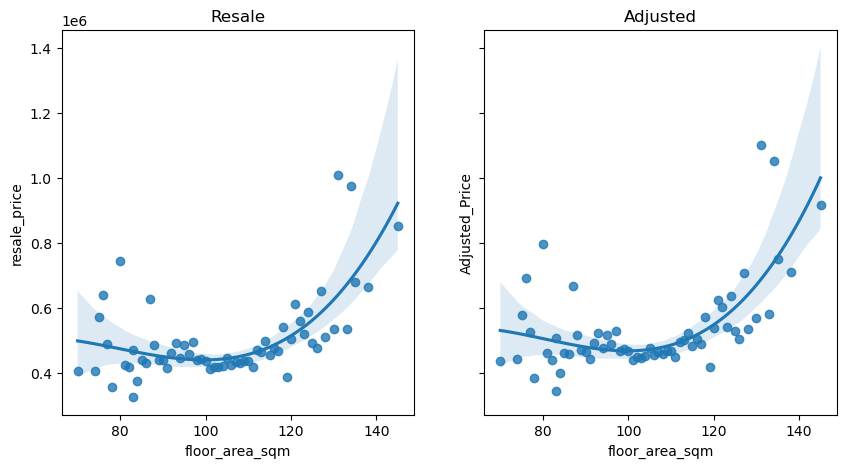

In [358]:
#Comparing Adjust_price vs Resale Price 4 Room
Four_flr_ap = flr_area_avg_ap[flr_area_avg_ap['flat_type']=='4 ROOM']

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
resale_four_room = sns.regplot(x='floor_area_sqm', y='resale_price', data=Four_flr_price, order = 3 ,ax=ax1)
adjusted_four_room = sns.regplot(x='floor_area_sqm', y='Adjusted_Price', data=Four_flr_ap, order = 3, ax=ax2)
resale_four_room.set_title('Resale')
adjusted_four_room.set_title('Adjusted')

plt.show()

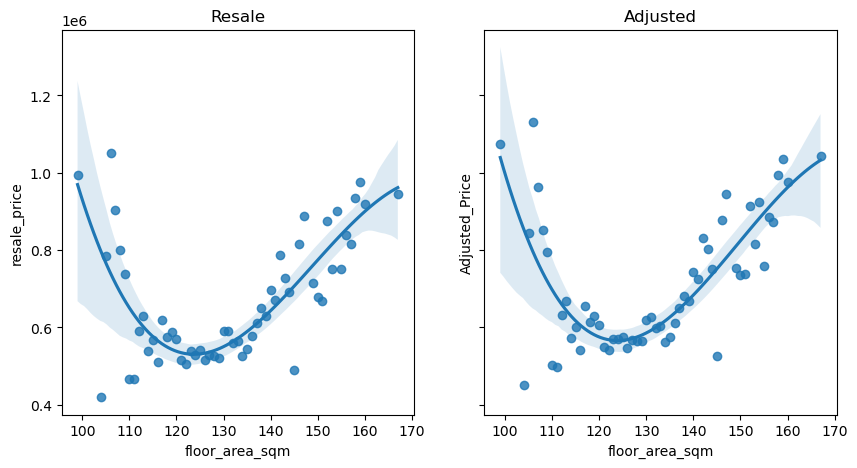

In [359]:
#Comparing Adjust_price vs Resale Price 4 Room
Five_flr_ap = flr_area_avg_ap[flr_area_avg_ap['flat_type']=='5 ROOM']

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
resale_five_room = sns.regplot(x='floor_area_sqm', y='resale_price', data=Five_flr_price, order = 3 ,ax=ax1)
adjusted_five_room = sns.regplot(x='floor_area_sqm', y='Adjusted_Price', data=Five_flr_ap, order = 3, ax=ax2)
resale_five_room.set_title('Resale')
adjusted_five_room.set_title('Adjusted')

plt.show()

**Note:**

With the side by side comparison, it seems that using CPI Adjusted Resale Price might have a slight edge for building the predictive model

## Predictive Model: Setting the Baseline Using Linear Regression

### Import Scikit-Learn Libraries

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Linear Regression for the first Baseline

In [361]:
# Change flat_type values and dtype to category

def change_flat_type(df):
    df['flat_type'] = df['flat_type'].replace({'1 ROOM': 'ONE_ROOM',
                                                 '2 ROOM': 'TWO_ROOM',
                                                 '3 ROOM': 'THREE_ROOM',
                                                 '4 ROOM': 'FOUR_ROOM',
                                                 '5 ROOM': 'FIVE_ROOM'}).astype('category')
    return df

df_resale = change_flat_type(df_resale)

In [362]:
#Change flat_model and town to dtype category
df_resale['flat_model'] = df_resale.flat_model.astype('category')
df_resale['town'] = df_resale.town.astype('category')

In [363]:
# Reduced Adjusted and Resale Price by 1000
df_resale['Adjusted_Price'] = df_resale['Adjusted_Price'] / 1000

In [364]:
# Get unique values in the column 'flat_type' and convert into dictionary call dfs 

def unique_flat_types(df):
    unique_flat_types = df['flat_type'].unique()
    return unique_flat_types

def create_flat_dict(df):
    unique_types = unique_flat_types(df)
    dfs = {flat_type: df[df['flat_type'] == flat_type] for flat_type in unique_types}
    return dfs

dfs = create_flat_dict(df_resale)

In [365]:
#Convert Dictionary to Dataframe

def create_flat_dfs(flat_dict):
    flat_types = list(flat_dict.keys())
    for flat_type in flat_types:
        df = pd.DataFrame(flat_dict[flat_type])
        globals()[flat_type] = df
        print(flat_type + ' DataFrame created successfully')

create_flat_dfs(dfs)

TWO_ROOM DataFrame created successfully
THREE_ROOM DataFrame created successfully
FOUR_ROOM DataFrame created successfully
FIVE_ROOM DataFrame created successfully
EXECUTIVE DataFrame created successfully
ONE_ROOM DataFrame created successfully
MULTI-GENERATION DataFrame created successfully


In [462]:
%%time

def linear_regression(flat_type):
    # Extract the data for each flat_type
    data = dfs[flat_type]
    
    
    # Extract the data for each flat_type
    features = ['Tranc_Yr', 'Tranc_Mth', 'median_flr', 'town', 'flat_model', 'Distance_from_CBD', 'remaining_yr', 'floor_area_sqm']
    
    # Define X and y
    X = data.loc[:, features]
    y = data.loc[:, 'Adjusted_Price']
    
    # Pipeline KNN to handle null values and outliers and StandardScaler numerical columns
    num_trans = make_pipeline(KNNImputer(n_neighbors=10), 
                              StandardScaler())
    
    cat_trans = make_pipeline(OneHotEncoder())
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Creating the numerical and categorical columns
    
    cat_cols = [cname for cname in X.columns if X[cname].dtype == ['object', 'category']]
    num_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
                  
    # set up the column transformer to apply OneHotEncoder and StandardScaler
    # Create the ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[('cat', cat_trans, cat_cols),
                      ('Std', num_trans, num_cols)])
    
    #Instantiation: Linear Regression
    linreg = LinearRegression()
    
    # set up the pipeline with the column transformer and the linear regression model
    
    pipeline_lr = Pipeline([('preprocessor', preprocessor),
                        ('model', linreg)])
    
    # Fit the linear regression model
    pipeline_lr.fit(X_train, y_train)
    
    #Scoring
    y_pred = pipeline_lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(y_test, y_pred)
    score = pipeline_lr.score(X_test, y_test)
    
    print('Scores for {}'.format(flat_type))
    print('R2 Score:', score)
    print('MSE Score:', mse)
    print('RMSE Score:', rmse)
    print('MAE Score:', mae, '\n')
    
    #get Actual and Predicted df
    compare = pd.DataFrame({'Actual (000)': y_test, 'Predicted (000)': y_pred})
    
    #Apply Function to round off to nearest 1000
    
    compare['Predicted (000)'] = round(compare['Predicted (000)'])


    #Get Dataframe to show the price diff between Actual and Predicted
    compare['Price Diff (000)'] = compare['Predicted (000)'] - compare['Actual (000)']
    compare['Percent Diff'] = (compare['Predicted (000)'] - compare['Actual (000)']) / compare['Actual (000)'] *100
    
    compare_styled = compare.head(30).style.format('{:.1f}', na_rep="")\
    .bar(subset=['Percent Diff'], color='#01C6BA', align='zero')
    
    display(compare_styled)
    print('\n')
    display(compare.describe().round(2))
    print('\n')
    
#Apply the function to each flat_type

for flat_type in dfs.keys():
    linear_regression(flat_type)

Scores for TWO_ROOM
R2 Score: 0.5380223055474596
MSE Score: 1016.9117977471655
RMSE Score: 31.889054513220763
MAE Score: 22.41387048899876 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
138285,333.1,293.0,-40.1,-12.0
86248,297.4,250.0,-47.4,-15.9
61206,239.8,250.0,10.2,4.3
34439,197.3,217.0,19.7,10.0
50065,266.4,265.0,-1.4,-0.5
88300,247.4,244.0,-3.4,-1.4
43905,240.1,276.0,35.9,15.0
1840,231.5,208.0,-23.5,-10.2
22872,267.4,226.0,-41.4,-15.5
78446,221.7,312.0,90.3,40.7


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,683.00,683.00,683.00,683.00
mean,272.46,271.64,-0.83,0.68
std,46.95,36.37,31.91,10.71
min,172.70,176.00,-261.20,-44.86
25%,241.20,247.00,-16.80,-5.58
50%,265.50,273.00,0.50,0.20
75%,297.40,298.00,18.40,7.02
max,582.20,365.00,90.30,41.41




Scores for THREE_ROOM
R2 Score: 0.6629948254643405
MSE Score: 2629.601435635129
RMSE Score: 51.27963958175924
MAE Score: 37.900600365687815 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
78681,508.3,463.0,-45.3,-8.9
14130,258.0,211.0,-47.0,-18.2
123119,415.9,424.0,8.1,1.9
97251,260.8,300.0,39.2,15.0
29960,333.0,336.0,3.0,0.9
43719,380.5,406.0,25.5,6.7
82478,405.6,418.0,12.4,3.1
10269,353.9,294.0,-59.9,-16.9
89606,329.7,358.0,28.3,8.6
137369,341.3,322.0,-19.3,-5.7


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,10358.00,10358.00,10358.00,10358.00
mean,355.86,356.27,0.41,1.62
std,88.34,72.54,51.28,13.44
min,184.80,157.00,-539.10,-58.72
25%,297.60,309.00,-26.90,-7.58
50%,340.10,347.00,4.40,1.28
75%,389.50,395.75,33.20,10.18
max,1311.40,1242.00,201.40,96.97




Scores for FOUR_ROOM
R2 Score: 0.7498063137482651
MSE Score: 4731.583840011499
RMSE Score: 68.78650914250191
MAE Score: 54.396388518207786 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
49417,513.2,520.0,6.8,1.3
9699,385.4,393.0,7.6,2.0
115005,487.4,448.0,-39.4,-8.1
92883,396.6,463.0,66.4,16.7
2101,687.1,597.0,-90.1,-13.1
94518,458.4,421.0,-37.4,-8.2
144644,595.3,658.0,62.7,10.5
61689,390.6,514.0,123.4,31.6
103859,465.4,535.0,69.6,15.0
50461,304.4,329.0,24.6,8.1


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,18401.00,18401.00,18401.00,18401.00
mean,506.37,507.14,0.77,1.57
std,137.52,119.16,68.78,13.53
min,257.60,173.00,-482.30,-50.91
25%,414.80,426.00,-43.90,-8.42
50%,475.00,498.00,3.40,0.71
75%,556.60,569.00,47.40,10.52
max,1296.70,1024.00,227.70,57.66




Scores for FIVE_ROOM
R2 Score: 0.7241626113181286
MSE Score: 7316.1091659027825
RMSE Score: 85.5342572651612
MAE Score: 67.4622744883732 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
43068,408.3,456.0,47.7,11.7
145741,512.3,536.0,23.7,4.6
3649,421.4,522.0,100.6,23.9
103569,635.1,632.0,-3.1,-0.5
123353,1108.6,855.0,-253.6,-22.9
77195,476.0,686.0,210.0,44.1
121633,665.4,667.0,1.6,0.2
94456,527.4,502.0,-25.4,-4.8
55833,445.3,590.0,144.7,32.5
37344,483.6,469.0,-14.6,-3.0


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,11159.00,11159.00,11159.00,11159.00
mean,609.50,609.22,-0.28,1.59
std,162.87,138.43,85.54,13.98
min,311.40,184.00,-421.10,-49.46
25%,492.90,513.00,-53.60,-8.45
50%,573.10,597.00,2.30,0.40
75%,683.50,682.00,59.05,10.94
max,1444.00,1252.00,275.30,59.89




Scores for EXECUTIVE
R2 Score: 0.638551604195812
MSE Score: 6708.745579019189
RMSE Score: 81.90693242344746
MAE Score: 64.17921549576738 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
74294,648.5,688.0,39.5,6.1
112364,855.9,833.0,-22.9,-2.7
71262,551.6,627.0,75.4,13.7
42616,794.8,893.0,98.2,12.4
78252,665.2,737.0,71.8,10.8
98320,761.5,822.0,60.5,7.9
57159,651.5,735.0,83.5,12.8
89042,914.9,897.0,-17.9,-2.0
15840,641.7,711.0,69.3,10.8
111804,870.7,767.0,-103.7,-11.9


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,3424.00,3424.00,3424.00,3424.00
mean,717.03,717.03,0.01,1.15
std,136.26,110.74,81.92,11.16
min,420.50,423.00,-439.50,-33.95
25%,614.38,642.75,-48.82,-6.59
50%,698.55,713.00,6.45,0.99
75%,799.40,785.00,57.23,8.76
max,1337.00,1192.00,318.80,51.02




Scores for ONE_ROOM
R2 Score: 0.10337462625809535
MSE Score: 272.33847272070534
RMSE Score: 16.502680773762346
MAE Score: 13.8111188830961 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
2572,206.6,185.0,-21.6,-10.5
11821,199.4,193.0,-6.4,-3.2
70924,194.7,208.0,13.3,6.8
30582,206.6,199.0,-7.6,-3.7
91849,226.4,214.0,-12.4,-5.5
127994,254.7,223.0,-31.7,-12.4
83133,194.8,218.0,23.2,11.9
48795,195.7,203.0,7.3,3.7
92036,219.3,217.0,-2.3,-1.0
28543,198.7,195.0,-3.7,-1.9


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,18.00,18.00,18.00,18.00
mean,207.31,204.17,-3.14,-1.02
std,17.93,11.28,16.72,8.04
min,178.60,185.00,-31.70,-12.45
25%,195.02,195.00,-12.70,-5.62
50%,203.35,204.50,-4.40,-2.21
75%,218.58,213.75,8.58,4.15
max,254.70,223.00,27.40,15.34




Scores for MULTI-GENERATION
R2 Score: 0.6596958104840487
MSE Score: 2482.2791129098655
RMSE Score: 49.8224759813266
MAE Score: 40.85885431286303 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
26482,806.0,824.0,18.0,2.2
121012,881.8,936.0,54.2,6.1
40646,811.6,828.0,16.4,2.0
15158,737.1,730.0,-7.1,-1.0
54559,847.3,887.0,39.7,4.7
110901,767.6,784.0,16.4,2.1
36787,842.2,897.0,54.8,6.5
77871,784.3,834.0,49.7,6.3
38386,858.9,737.0,-121.9,-14.2
115055,942.0,980.0,38.0,4.0


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,22.00,22.00,22.00,22.00
mean,842.63,863.23,20.60,2.59
std,87.42,89.54,46.52,5.46
min,662.70,704.00,-121.90,-14.19
25%,789.72,817.25,14.15,1.68
50%,840.50,867.50,36.15,4.21
75%,876.28,915.00,46.55,6.18
max,1037.90,1060.00,100.30,11.67




CPU times: user 1.5 s, sys: 1 s, total: 2.5 s
Wall time: 1.02 s


**Summary Baseline Scoring for All Flat Types**

| Flat Type  | 1 Room | 2 Room | 3 Room | 4 Room | 5 Room | Executive | Multi-Gen |
|------------|--------|--------|--------|--------|--------|-----------|-----------|
| R^2 Score  |  0.10  | 0.54   | 0.66   | 0.75   | 0.72   | 0.64      | 0.66      |
| Min % Diff | -12.45 | -44.86 | -58.72 | -50.91 | -49.46 | -33.95    | -14.19    |
| Max % Diff |  15.34 | 41.41  | 96.97  | 57.66  | 59.89  | 51.02     |  11.67    |

From the above summary,
- It is understandable that 1 Room R^2 score is very low because it is based on 1 block of flats and prices are very widely distributed and only 58 transactions in the last 6 years.
- 4 Room and 5 Room scored slightly better in their R^2 score howevery they also have a wide Percentage Difference in prices
- 3 Room has the widest Percentage Difference in price as expected, from the earlier scatterplot visualization.

**Suggested Improvement:**
**1. Gradient Boosting** 
- Using XGBRegressor for better result.

**2. Bagging / Bootstrapping**
- Using RandomForestRegressor with Boostrap as hyperparameter. 

### RandomForestRegressor

In [368]:
from sklearn.ensemble import RandomForestRegressor

In [461]:
%%time

def random_forest_regression(flat_type):
    
    # Extract the data for each flat_type
    data = dfs[flat_type]
    
    
    # Extract the data for each flat_type
    features = ['Tranc_Yr', 'Tranc_Mth', 'median_flr', 'town', 'flat_model', 'Distance_from_CBD', 'remaining_yr', 'floor_area_sqm']
    
    # Define X and y
    X = data.loc[:, features]
    y = data.loc[:, 'Adjusted_Price']
    
    # Pipeline KNN to handle null values and outliers and StandardScaler numerical columns
    num_trans = make_pipeline(KNNImputer(n_neighbors=10), 
                              StandardScaler())
    
    cat_trans = make_pipeline(OneHotEncoder())
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Creating the numerical and categorical columns
    
    cat_cols = [cname for cname in X.columns if X[cname].dtype == ['object', 'category']]
    num_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
                  
    # set up the column transformer to apply OneHotEncoder and StandardScaler
    # Create the ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[('cat', cat_trans, cat_cols),
                      ('Std', num_trans, num_cols)])
    
    #Instantiation RandomForestRegressor
    rf = RandomForestRegressor(criterion='squared_error', n_estimators=100, min_samples_split=5, n_jobs=3,
                               min_samples_leaf=3, max_depth=13, bootstrap=True, max_samples=0.3, 
                               min_impurity_decrease = 0.1, max_features='auto', verbose=1, random_state=42)    
    
    # set up the pipeline with the column transformer and the RandomForestRegressor model
    
    pipeline_rf = Pipeline([('preprocessor', preprocessor),
                        ('model', rf)])
    
    # Fit the linear regression model
    pipeline_rf.fit(X_train, y_train)
    
    #Scoring
    y_pred = pipeline_rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(y_test, y_pred)
    score = pipeline_rf.score(X_test, y_test)
    
    print('Scores for {}'.format(flat_type))
    print('R2 Score:', score)
    print('MSE Score:', mse)
    print('RMSE Score:', rmse)
    print('MAE Score:', mae, '\n')
    
    #get Actual and Predicted df
    compare = pd.DataFrame({'Actual (000)': y_test, 'Predicted (000)': y_pred})
    
    #Apply Function to round off to nearest 1000
    
    compare['Predicted (000)'] = round(compare['Predicted (000)'])


    #Get Dataframe to show the price diff between Actual and Predicted
    compare['Price Diff (000)'] = compare['Predicted (000)'] - compare['Actual (000)']
    compare['Percent Diff'] = (compare['Predicted (000)'] - compare['Actual (000)']) / compare['Actual (000)'] *100
    
    compare_styled = compare.head(30).style.format('{:.1f}', na_rep="")\
    .bar(subset=['Percent Diff'], color='#01C6BA', align='zero')
    
    display(compare_styled)
    print('\n')
    display(compare.describe().round(2))
    print('\n')
    
#Apply the function to each flat_type

for flat_type in dfs.keys():
    random_forest_regression(flat_type)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Scores for TWO_ROOM
R2 Score: 0.7051794737902826
MSE Score: 648.9630883066119
RMSE Score: 25.474753940060186
MAE Score: 14.702408943441867 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
138285,333.1,335.0,1.9,0.6
86248,297.4,219.0,-78.4,-26.4
61206,239.8,243.0,3.2,1.3
34439,197.3,217.0,19.7,10.0
50065,266.4,264.0,-2.4,-0.9
88300,247.4,246.0,-1.4,-0.6
43905,240.1,261.0,20.9,8.7
1840,231.5,229.0,-2.5,-1.1
22872,267.4,245.0,-22.4,-8.4
78446,221.7,274.0,52.3,23.6


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,683.00,683.00,683.00,683.00
mean,272.46,270.66,-1.80,0.02
std,46.95,38.65,25.43,7.64
min,172.70,204.00,-274.20,-47.10
25%,241.20,245.00,-10.50,-3.80
50%,265.50,264.00,-0.20,-0.08
75%,297.40,295.00,9.35,3.71
max,582.20,416.00,90.10,43.34


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


Scores for THREE_ROOM
R2 Score: 0.8844839820068955
MSE Score: 901.3543699204506
RMSE Score: 30.022564346178868
MAE Score: 22.0003896666169 



[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
78681,508.3,454.0,-54.3,-10.7
14130,258.0,246.0,-12.0,-4.7
123119,415.9,415.0,-0.9,-0.2
97251,260.8,304.0,43.2,16.6
29960,333.0,315.0,-18.0,-5.4
43719,380.5,370.0,-10.5,-2.8
82478,405.6,424.0,18.4,4.5
10269,353.9,309.0,-44.9,-12.7
89606,329.7,354.0,24.3,7.4
137369,341.3,316.0,-25.3,-7.4


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,10358.00,10358.00,10358.00,10358.00
mean,355.86,356.10,0.24,0.82
std,88.34,81.39,30.03,8.43
min,184.80,217.00,-328.50,-40.73
25%,297.60,304.00,-16.00,-4.35
50%,340.10,340.00,1.60,0.46
75%,389.50,382.00,18.00,5.54
max,1311.40,1027.00,225.20,121.86


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


Scores for FOUR_ROOM
R2 Score: 0.912077509163784
MSE Score: 1662.7623304435554
RMSE Score: 40.776982851157044
MAE Score: 30.06530899985095 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
49417,513.2,493.0,-20.2,-3.9
9699,385.4,407.0,21.6,5.6
115005,487.4,462.0,-25.4,-5.2
92883,396.6,453.0,56.4,14.2
2101,687.1,618.0,-69.1,-10.1
94518,458.4,443.0,-15.4,-3.4
144644,595.3,630.0,34.7,5.8
61689,390.6,434.0,43.4,11.1
103859,465.4,478.0,12.6,2.7
50461,304.4,316.0,11.6,3.8


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,18401.00,18401.00,18401.00,18401.00
mean,506.37,506.19,-0.18,0.72
std,137.52,128.42,40.78,7.97
min,257.60,268.00,-469.30,-49.54
25%,414.80,421.00,-21.20,-4.06
50%,475.00,478.00,2.30,0.48
75%,556.60,546.00,24.10,5.37
max,1296.70,1228.00,246.90,50.90


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


Scores for FIVE_ROOM
R2 Score: 0.903043813295859
MSE Score: 2571.5949879994173
RMSE Score: 50.71089614668052
MAE Score: 37.0618573137618 



[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
43068,408.3,418.0,9.7,2.4
145741,512.3,562.0,49.7,9.7
3649,421.4,452.0,30.6,7.3
103569,635.1,607.0,-28.1,-4.4
123353,1108.6,1076.0,-32.6,-2.9
77195,476.0,567.0,91.0,19.1
121633,665.4,665.0,-0.4,-0.1
94456,527.4,541.0,13.6,2.6
55833,445.3,545.0,99.7,22.4
37344,483.6,481.0,-2.6,-0.5


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,11159.00,11159.00,11159.00,11159.00
mean,609.50,608.69,-0.81,0.64
std,162.87,150.88,50.71,8.11
min,311.40,348.00,-361.60,-41.93
25%,492.90,495.00,-26.50,-4.24
50%,573.10,574.00,2.60,0.45
75%,683.50,676.50,28.80,5.26
max,1444.00,1308.00,270.30,60.65


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Scores for EXECUTIVE
R2 Score: 0.8201709100101418
MSE Score: 3337.7589344789317
RMSE Score: 57.77334103614687
MAE Score: 43.39226450895251 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
74294,648.5,638.0,-10.5,-1.6
112364,855.9,822.0,-33.9,-4.0
71262,551.6,576.0,24.4,4.4
42616,794.8,796.0,1.2,0.2
78252,665.2,660.0,-5.2,-0.8
98320,761.5,787.0,25.5,3.3
57159,651.5,684.0,32.5,5.0
89042,914.9,901.0,-13.9,-1.5
15840,641.7,682.0,40.3,6.3
111804,870.7,810.0,-60.7,-7.0


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,3424.00,3424.00,3424.00,3424.00
mean,717.03,716.36,-0.66,0.62
std,136.26,118.18,57.78,7.83
min,420.50,469.00,-397.50,-30.71
25%,614.38,623.00,-32.03,-4.19
50%,698.55,700.00,2.25,0.31
75%,799.40,791.00,34.33,5.24
max,1337.00,1141.00,277.50,44.44


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Scores for ONE_ROOM
R2 Score: 0.39051228613911193
MSE Score: 185.12408637532963
RMSE Score: 13.606031249976226
MAE Score: 10.418233509700183 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
2572,206.6,202.0,-4.6,-2.2
11821,199.4,201.0,1.6,0.8
70924,194.7,197.0,2.3,1.2
30582,206.6,199.0,-7.6,-3.7
91849,226.4,216.0,-10.4,-4.6
127994,254.7,227.0,-27.7,-10.9
83133,194.8,207.0,12.2,6.3
48795,195.7,194.0,-1.7,-0.9
92036,219.3,218.0,-1.3,-0.6
28543,198.7,201.0,2.3,1.2


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,18.00,18.00,18.00,18.00
mean,207.31,204.78,-2.53,-0.80
std,17.93,10.18,13.78,6.40
min,178.60,194.00,-27.70,-11.87
25%,195.02,199.00,-9.70,-4.36
50%,203.35,201.00,0.15,0.10
75%,218.58,205.75,2.30,1.18
max,254.70,227.00,17.40,9.74


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


Scores for MULTI-GENERATION
R2 Score: 0.21962075521717261
MSE Score: 5692.316342705462
RMSE Score: 75.44744092880462
MAE Score: 63.973394913419995 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
26482,806.0,873.0,67.0,8.3
121012,881.8,913.0,31.2,3.5
40646,811.6,874.0,62.4,7.7
15158,737.1,848.0,110.9,15.0
54559,847.3,872.0,24.7,2.9
110901,767.6,840.0,72.4,9.4
36787,842.2,894.0,51.8,6.2
77871,784.3,876.0,91.7,11.7
38386,858.9,834.0,-24.9,-2.9
115055,942.0,911.0,-31.0,-3.3


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,22.00,22.00,22.00,22.00
mean,842.63,887.27,44.64,6.06
std,87.42,32.88,62.15,8.04
min,662.70,834.00,-90.90,-8.76
25%,789.72,870.50,9.70,1.11
50%,840.50,894.00,55.50,6.60
75%,876.28,908.75,72.37,9.34
max,1037.90,947.00,172.30,26.00




CPU times: user 13.6 s, sys: 1.02 s, total: 14.6 s
Wall time: 7.11 s


**Score Observation:**

| Model       | 1 Room | 2 Room | 3 Room | 4 Room | 5 Room | Executive | Multi-Gen |
|-------------|--------|--------|--------|--------|--------|-----------|-----------|
| **Linear Regression**  | 
| R^2 Score   |  0.10  | 0.54   | 0.66   | 0.75   | 0.72   | 0.64      | 0.66      |
| **RandomForest Regression** | 
| R^2 Score   |  0.39  | 0.71   | 0.88   | 0.91   | 0.90   | 0.82      | 0.17      |
|             |        |        |        |        |        |           |           |

**Hyperparameter:** *criterion='squared_error', n_estimators=100, min_samples_split=5, n_jobs=3,
                   min_samples_leaf=3, max_depth=13, bootstrap=True, max_samples=0.3, 
                        min_impurity_decrease = 0.1, max_features ='auto', verbose=1, random_state=42*
                        
Overall all except Multi-Gen R^2 score improved. Multi-Gen performs better in Linear Regression. 

### XGBoost Regressor

Let's see using XGBRegressor will give us a better score

In [457]:
from xgboost import XGBRegressor

In [460]:
%%time

def XGB_r(flat_type):
    
    # Extract the data for each flat_type
    data = dfs[flat_type]
    
    
    # Extract the data for each flat_type
    features = ['Tranc_Yr', 'Tranc_Mth', 'median_flr', 'town', 'flat_model', 'Distance_from_CBD', 'remaining_yr', 'floor_area_sqm']
    
    # Define X and y
    X = data.loc[:, features]
    y = data.loc[:, 'Adjusted_Price']
    
    # Pipeline KNN to handle null values and outliers and StandardScaler numerical columns
    num_trans = make_pipeline(KNNImputer(n_neighbors=10), 
                              StandardScaler())
    
    cat_trans = make_pipeline(OneHotEncoder())
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Creating the numerical and categorical columns
    
    cat_cols = [cname for cname in X.columns if X[cname].dtype == ['object', 'category']]
    num_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
                  
    # set up the column transformer to apply OneHotEncoder and StandardScaler
    # Create the ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[('cat', cat_trans, cat_cols),
                      ('Std', num_trans, num_cols)])
    
    #Instantiation XGBRegressor
    xgbr = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, learning_rate=0.1, seed = 123)
    
    # set up the pipeline with the column transformer and the linear regression model
    
    pipeline_xgbr = Pipeline([('preprocessor', preprocessor),
                        ('model', xgbr)])
    
    # Fit the linear regression model
    pipeline_xgbr.fit(X_train, y_train)
    
    #Scoring
    y_pred = pipeline_xgbr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae= mean_absolute_error(y_test, y_pred)
    score = pipeline_xgbr.score(X_test, y_test)
    
    print('Scores for {}'.format(flat_type))
    print('R2 Score:', score)
    print('MSE Score:', mse)
    print('RMSE Score:', rmse)
    print('MAE Score:', mae, '\n')
    
    #get Actual and Predicted df
    compare = pd.DataFrame({'Actual (000)': y_test, 'Predicted (000)': y_pred})
    
    #Apply Function to round off to nearest 1000
    
    compare['Predicted (000)'] = round(compare['Predicted (000)'])


    #Get Dataframe to show the price diff between Actual and Predicted
    compare['Price Diff (000)'] = compare['Predicted (000)'] - compare['Actual (000)']
    compare['Percent Diff'] = (compare['Predicted (000)'] - compare['Actual (000)']) / compare['Actual (000)'] *100
    
    compare_styled = compare.head(30).style.format('{:.1f}', na_rep="")\
    .bar(subset=['Percent Diff'], color='#01C6BA', align='zero')
    
    display(compare_styled)
    print('\n')
    display(compare.describe().round(2))
    print('\n')
    
#Apply the function to each flat_type

for flat_type in dfs.keys():
    XGB_r(flat_type)

Scores for TWO_ROOM
R2 Score: 0.8379317362994421
MSE Score: 356.7469411976711
RMSE Score: 18.887745794500493
MAE Score: 12.956850856708398 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
138285,333.1,337.0,3.9,1.2
86248,297.4,220.0,-77.4,-26.0
61206,239.8,237.0,-2.8,-1.2
34439,197.3,223.0,25.7,13.0
50065,266.4,270.0,3.6,1.4
88300,247.4,247.0,-0.4,-0.2
43905,240.1,248.0,7.9,3.3
1840,231.5,236.0,4.5,1.9
22872,267.4,247.0,-20.4,-7.6
78446,221.7,248.0,26.3,11.9


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,683.00,683.00,683.00,683.00
mean,272.46,270.81,-1.65,-0.11
std,46.95,40.95,18.83,6.69
min,172.70,191.00,-143.20,-26.03
25%,241.20,243.00,-10.75,-3.80
50%,265.50,264.00,-0.60,-0.19
75%,297.40,293.00,8.65,3.41
max,582.20,480.00,88.10,42.38




Scores for THREE_ROOM
R2 Score: 0.8952698825973908
MSE Score: 817.1935859904605
RMSE Score: 28.586598013587775
MAE Score: 21.48411129548021 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
78681,508.3,444.0,-64.3,-12.7
14130,258.0,247.0,-11.0,-4.3
123119,415.9,415.0,-0.9,-0.2
97251,260.8,295.0,34.2,13.1
29960,333.0,310.0,-23.0,-6.9
43719,380.5,373.0,-7.5,-2.0
82478,405.6,417.0,11.4,2.8
10269,353.9,315.0,-38.9,-11.0
89606,329.7,351.0,21.3,6.5
137369,341.3,308.0,-33.3,-9.8


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,10358.00,10358.00,10358.00,10358.00
mean,355.86,355.90,0.04,0.70
std,88.34,82.93,28.58,8.14
min,184.80,216.00,-202.40,-33.33
25%,297.60,303.00,-16.00,-4.35
50%,340.10,340.00,1.40,0.41
75%,389.50,381.00,17.60,5.47
max,1311.40,1276.00,236.10,87.77




Scores for FOUR_ROOM
R2 Score: 0.9069495148005223
MSE Score: 1759.741337485589
RMSE Score: 41.949271000645396
MAE Score: 31.358542192358666 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
49417,513.2,488.0,-25.2,-4.9
9699,385.4,416.0,30.6,7.9
115005,487.4,461.0,-26.4,-5.4
92883,396.6,444.0,47.4,12.0
2101,687.1,608.0,-79.1,-11.5
94518,458.4,438.0,-20.4,-4.5
144644,595.3,620.0,24.7,4.1
61689,390.6,430.0,39.4,10.1
103859,465.4,492.0,26.6,5.7
50461,304.4,319.0,14.6,4.8


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,18401.00,18401.00,18401.00,18401.00
mean,506.37,506.50,0.13,0.82
std,137.52,128.45,41.96,8.23
min,257.60,266.00,-468.30,-49.44
25%,414.80,423.00,-22.30,-4.23
50%,475.00,479.00,3.10,0.62
75%,556.60,545.00,26.10,5.77
max,1296.70,1251.00,188.90,49.26




Scores for FIVE_ROOM
R2 Score: 0.9015508744401918
MSE Score: 2611.1926063580963
RMSE Score: 51.099829807525744
MAE Score: 38.092312104920566 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
43068,408.3,425.0,16.7,4.1
145741,512.3,578.0,65.7,12.8
3649,421.4,455.0,33.6,8.0
103569,635.1,615.0,-20.1,-3.2
123353,1108.6,1098.0,-10.6,-1.0
77195,476.0,580.0,104.0,21.8
121633,665.4,670.0,4.6,0.7
94456,527.4,536.0,8.6,1.6
55833,445.3,526.0,80.7,18.1
37344,483.6,478.0,-5.6,-1.2


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,11159.00,11159.00,11159.00,11159.00
mean,609.50,609.26,-0.24,0.73
std,162.87,151.79,51.10,8.23
min,311.40,349.00,-323.70,-37.48
25%,492.90,498.00,-27.30,-4.32
50%,573.10,574.00,2.90,0.53
75%,683.50,676.00,31.65,5.67
max,1444.00,1377.00,257.30,57.73




Scores for EXECUTIVE
R2 Score: 0.8437708534383614
MSE Score: 2899.7267894284273
RMSE Score: 53.84911131512225
MAE Score: 40.94381587839572 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
74294,648.5,643.0,-5.5,-0.8
112364,855.9,820.0,-35.9,-4.2
71262,551.6,585.0,33.4,6.1
42616,794.8,800.0,5.2,0.7
78252,665.2,668.0,2.8,0.4
98320,761.5,750.0,-11.5,-1.5
57159,651.5,664.0,12.5,1.9
89042,914.9,909.0,-5.9,-0.6
15840,641.7,663.0,21.3,3.3
111804,870.7,818.0,-52.7,-6.1


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,3424.00,3424.00,3424.00,3424.00
mean,717.03,716.13,-0.90,0.50
std,136.26,121.19,53.85,7.38
min,420.50,464.00,-306.50,-25.55
25%,614.38,623.00,-31.70,-4.24
50%,698.55,701.00,1.60,0.25
75%,799.40,792.00,33.10,4.92
max,1337.00,1215.00,204.50,40.43




Scores for ONE_ROOM
R2 Score: -0.4095450564895913
MSE Score: 428.13125655073674
RMSE Score: 20.691332884827325
MAE Score: 17.36128811306424 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
2572,206.6,225.0,18.4,8.9
11821,199.4,216.0,16.6,8.3
70924,194.7,187.0,-7.7,-4.0
30582,206.6,194.0,-12.6,-6.1
91849,226.4,206.0,-20.4,-9.0
127994,254.7,235.0,-19.7,-7.7
83133,194.8,224.0,29.2,15.0
48795,195.7,199.0,3.3,1.7
92036,219.3,206.0,-13.3,-6.1
28543,198.7,189.0,-9.7,-4.9


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,18.00,18.00,18.00,18.00
mean,207.31,209.39,2.08,1.52
std,17.93,17.12,21.14,10.14
min,178.60,179.00,-46.80,-20.73
25%,195.02,194.75,-11.87,-5.77
50%,203.35,211.00,1.25,0.64
75%,218.58,223.50,18.40,9.31
max,254.70,235.00,35.50,19.03




Scores for MULTI-GENERATION
R2 Score: 0.7764952595619632
MSE Score: 1630.309487564137
RMSE Score: 40.377091123112585
MAE Score: 32.407251531427555 



,Actual (000),Predicted (000),Price Diff (000),Percent Diff
26482,806.0,823.0,17.0,2.1
121012,881.8,903.0,21.2,2.4
40646,811.6,854.0,42.4,5.2
15158,737.1,706.0,-31.1,-4.2
54559,847.3,836.0,-11.3,-1.3
110901,767.6,735.0,-32.6,-4.2
36787,842.2,887.0,44.8,5.3
77871,784.3,807.0,22.7,2.9
38386,858.9,759.0,-99.9,-11.6
115055,942.0,949.0,7.0,0.7


,Actual (000),Predicted (000),Price Diff (000),Percent Diff
count,22.00,22.00,22.00,22.00
mean,842.63,853.00,10.37,1.35
std,87.42,87.19,39.96,4.86
min,662.70,676.00,-99.90,-11.63
25%,789.72,808.50,-8.80,-1.04
50%,840.50,857.50,16.15,2.06
75%,876.28,900.75,34.05,3.99
max,1037.90,1025.00,84.30,11.57




CPU times: user 32 s, sys: 603 ms, total: 32.6 s
Wall time: 8.61 s


**Outcomes:**

- Overall, XGBRegressor outperforms the earlier 2 models. 
- It is able to push 2 Room R^2 score up to 0.84
- Multi-Gen R^2 score is now at 0.78
- As a preliminary round of parameter tuning, it has already gotten pretty impressive result. 
- In addition, we are seeing predicted price closer to the Actual price 